In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep 13 07:53:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/surprise/Training_28461604.jpg  
 extracting: train/surprise/Training_28494223.jpg  
 extracting: train/surprise/Training_28554602.jpg  
 extracting: train/surprise/Training_28577341.jpg  
 extracting: train/surprise/Training_28627177.jpg  
 extracting: train/surprise/Training_28640249.jpg  
 extracting: train/surprise/Training_28827100.jpg  
 extracting: train/surprise/Training_28871534.jpg  
 extracting: train/surprise/Training_28948272.jpg  
 extracting: train/surprise/Training_28955181.jpg  
 extracting: train/surprise/Training_28979031.jpg  
 extracting: train/surprise/Training_29009403.jpg  
 extracting: train/surprise/Training_29053915.jpg  
 extracting: train/surprise/Training_29056438.jpg  
 extracting: train/surprise/Training_29088753.jpg  
 extracting: train/surprise/Training_29097606.jpg  
 extracting: train/surprise/Training_29166236.jpg  
 extracting: train/surprise/Training_29259583.jpg  
 extracting: train/surprise/

In [ ]:
!pip install noggin
!pip install livelossplot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from livelossplot import PlotLossesKerasTF
import tensorflow as tf

In [ ]:
print("\nTraining dataset\n")
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")
print("\nTest dataset\n")
for expression in os.listdir("test/"):
    print(str(len(os.listdir("test/" + expression))) + " " + expression + " images")


Training dataset

3689 fear images
4382 sad images
6502 happy images
3606 angry images
2859 surprise images
394 disgust images
4549 neutral images

Test dataset

1024 fear images
1247 sad images
1774 happy images
958 angry images
831 surprise images
111 disgust images
1233 neutral images


In [ ]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25981 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

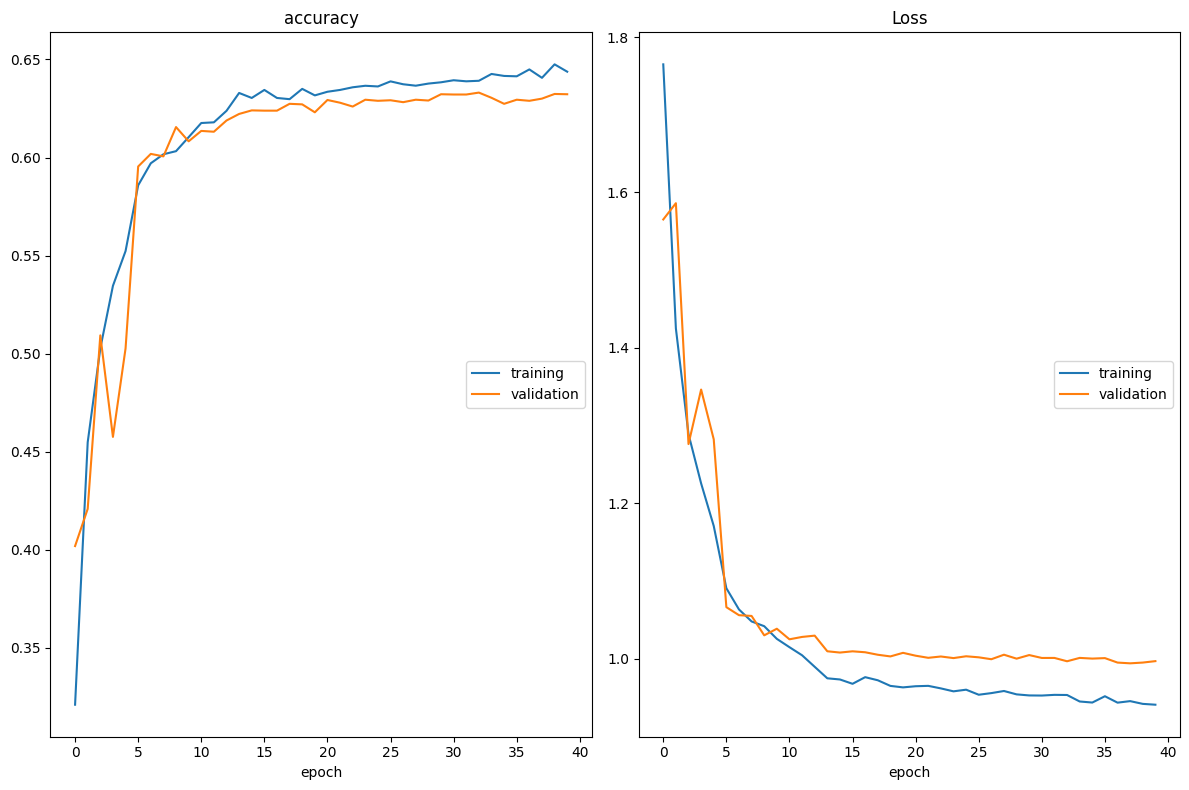

accuracy
	training         	 (min:    0.321, max:    0.647, cur:    0.644)
	validation       	 (min:    0.402, max:    0.633, cur:    0.632)
Loss
	training         	 (min:    0.941, max:    1.765, cur:    0.941)
	validation       	 (min:    0.994, max:    1.586, cur:    0.997)

Epoch 40: saving model to model_weights.h5
405/405 [==============================] - 9s 23ms/step - loss: 0.9408 - accuracy: 0.6437 - val_loss: 0.9969 - val_accuracy: 0.6323 - lr: 1.0000e-05
CPU times: user 8min 56s, sys: 57.8 s, total: 9min 53s
Wall time: 6min 33s


In [ ]:
%%time

epochs = 40
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# 이미지 불러오기
img_path = '/content/happy.jpg'  # 이미지 파일 경로를 지정해주세요.
img = image.load_img(img_path, target_size=(48, 48), grayscale=True)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # 배치 형태로 변환

# 모델에 이미지 전달하여 예측 수행
emotion_probs = model.predict(img_array)[0]

# 클래스별 확률 출력
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for i, prob in enumerate(emotion_probs):
    print(f'{classes[i]}: {prob}')

# 가장 높은 확률을 가지는 클래스 선택
predicted_emotion = classes[np.argmax(emotion_probs)]
print(f'Predicted Emotion: {predicted_emotion}')

1/1 [==============================] - 0s 252ms/step
Angry: 0.027303021401166916
Disgust: 0.0004393316921778023
Fear: 0.04945724457502365
Happy: 0.7432536482810974
Sad: 0.09305272251367569
Surprise: 0.056655216962099075
Neutral: 0.029838884249329567
Predicted Emotion: Happy
